# 'ML _ Project using K-Means Clustering Algorithm'

In [4]:
# Importing relevant libraries
from  sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
#Loading the related csv file
df = pd.read_csv('C:\\Users\\user\\Documents\\PythonPractiseFiles\\DataFiles\\income_data.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

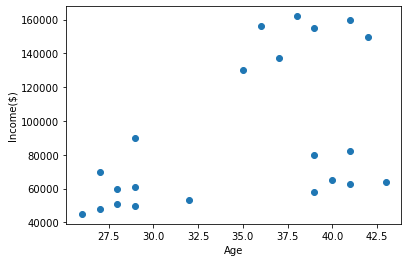

In [7]:
#Plotting the scatter graph between age and Income variable
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel("Age")
plt.ylabel('Income($)')

In [24]:
# Using K_Means algorithm and seting number of clusters to be 3
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])  #building the model by providing these two data
y_predicted  # saving the model into 'y variable'

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [25]:
#creating a new column named 'cluster' and saving y_predited value in it
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [16]:
km.cluster_centers_  # these are the centers of the three custers..with their x,y coordinates

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

ValueError: x and y must be the same size

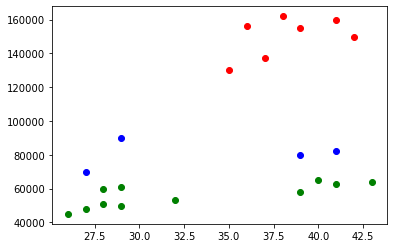

In [22]:
df1 = df[df.cluster==0] # different clusters are named different 
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color = 'green' )   # all three clusters plotted ith different colors
plt.scatter(df2.Age,df2['Income($)'],color = 'red' )
plt.scatter(df3.Age,df3['Income($)'],color = 'blue')
plt.scatter(km.cluster_centers_[:0],km.cluster_centers_[:1],color='purple',marker='+',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()




### The above graph has issues that in one cluster we are getting elements of the other cluster
### This problem is arising due the fact that both variables have different scales (Age 27 to 42) and (income in thousands 4k to 16k)
###  So we have to normalise both the parameters scaled properly w.r.t each other


In [27]:
# We will use minmax model to to make both age and income compatible
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [30]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


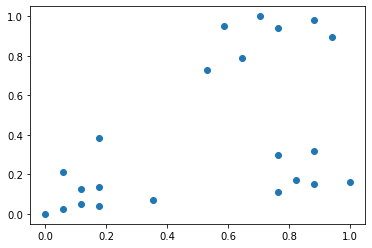

In [31]:
plt.scatter(df.Age,df['Income($)'])  #graph plotted between the two

In [32]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])   
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [33]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [34]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

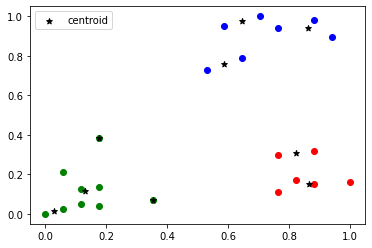

In [40]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

In [36]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\user\Documents\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


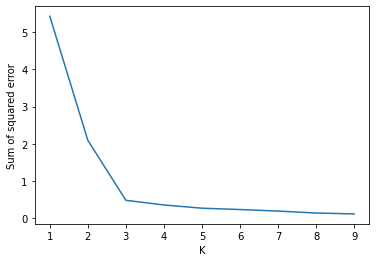

In [37]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

3Elb